<h1><center><font color=darkblue>ANALISIS DE LA DEMANDA ELÉCTRICA 2019</font></center></h1>

In [1]:
# Importando librerias principales (generales) ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. Data

In [2]:
# Cargando archivo ---
demand = pd.read_csv("data/Demand_PE_2019_15min.csv",
                        parse_dates=[0], index_col=0, dayfirst=1)

In [3]:
# Mostrando los 5 primeros datos ---
demand.head()

,DEMANDA TOTAL
FECHA,
2019-01-01 00:00:00,5708.87385
2019-01-01 00:15:00,5554.09774
2019-01-01 00:30:00,5507.87057
2019-01-01 00:45:00,5470.88846
2019-01-01 01:00:00,5434.64513


In [4]:
# Mostrando los 5 últimos datos ---
demand.tail()

,DEMANDA TOTAL
FECHA,
2019-12-31 22:45:00,6091.33159
2019-12-31 23:00:00,6035.75359
2019-12-31 23:15:00,6033.58259
2019-12-31 23:30:00,5993.59072
2019-12-31 23:45:00,5912.41697


In [194]:
# Información general ---
# Observamos que hay 35040 entradas (1 entrada cada 15 min), sin entrada nulas
demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2019-01-01 00:00:00 to 2019-12-31 23:45:00
Data columns (total 1 columns):
DEMANDA TOTAL    35040 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [195]:
# Estadísticas principales ---
demand.describe()

,DEMANDA TOTAL
count,35040.000000
mean,6037.587611
std,543.293440
min,4364.215490
25%,5533.515902
50%,6161.376415
75%,6496.336553
max,7107.550280


## 2. Gráficos y tendencias

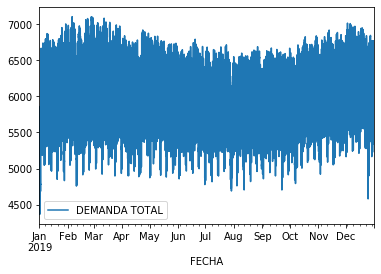

In [6]:
# Data original: 15 min ---
demand.plot()

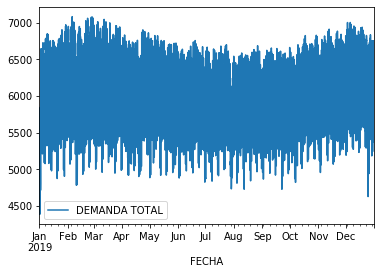

In [7]:
# Moving Average de 1 hora: 15min*4 ---

demand_MA_hourly = demand.rolling(window=4).mean()
demand_MA_hourly.plot()

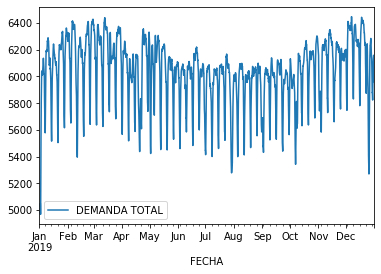

In [8]:
# Moving Average de 1 día: 15min*4*24 ---

demand_MA_daily = demand.rolling(window=96).mean()
demand_MA_daily.plot()

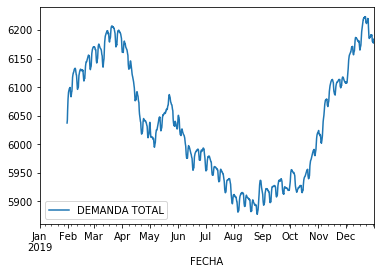

In [9]:
# Moving Average de 1 mes: 15min*4*24*30 ---

demand_MA_monthly = demand.rolling(window=2880).mean()
demand_MA_monthly.plot()

## 3. Diagrama de Carga

### 3.1 Diagrama de Carga - Promedio Anual

In [10]:
# Obteniendo un promedio anual para cada instante ---
by_time = demand.groupby(demand.index.time).mean()
by_time

,DEMANDA TOTAL
00:00:00,5797.831829
00:15:00,5713.180221
00:30:00,5645.154029
00:45:00,5587.971113
01:00:00,5534.969527
01:15:00,5485.460935
01:30:00,5443.797922
01:45:00,5410.278313
02:00:00,5369.786874
02:15:00,5342.072921


In [11]:
# Observamos que hay 96 instancias de tiempo (cada 15 min) ---
by_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 00:00:00 to 23:45:00
Data columns (total 1 columns):
DEMANDA TOTAL    96 non-null float64
dtypes: float64(1)
memory usage: 1.5+ KB


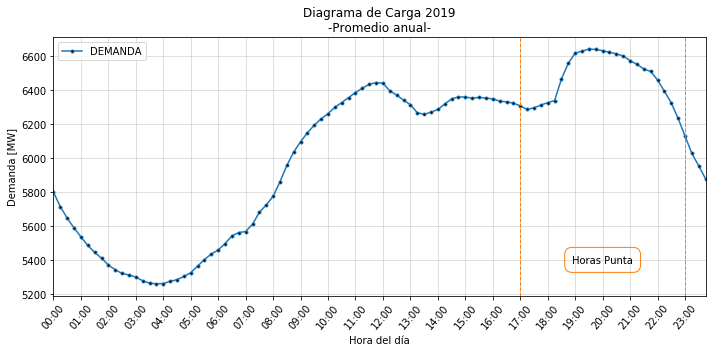

In [12]:
# Diagrama de carga 2019 - promedio anual ---
# Este diagrama es solo para ver la forma de la curva de demanda
# Para fines de análisis y de proyecciones se debe usar el día de máxima demanda
# Acá no señalo (marcador) el Ymáx (demanda máxima) porque solo es un promedio anual para visualización

hourly_ticks = 1*60*60*np.arange(24)

by_time.plot(xticks=hourly_ticks, figsize=(10, 5), style=['-'], marker='.', markerfacecolor='black')
plt.title('Diagrama de Carga 2019\n-Promedio anual-')
plt.legend(('DEMANDA',))
plt.xlabel('Hora del día')
plt.ylabel('Demanda [MW]')
plt.xticks(rotation=50)
plt.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=1, label='vertical line')
plt.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=1, label='vertical line')
plt.text("20:00", 5400, 'Horas Punta', bbox=dict(fc='none', ec='C1', boxstyle='round,pad=0.75'), ha='center', va='center')
plt.grid(True, lw=0.8, alpha=0.5)

plt.tight_layout()
plt.show()

### 3.2 Diagrama de Carga - Promedio Mensual

In [13]:
# Separando diagrama de carga por meses
by_time_month = []
for i in range(12):
    b_t_m = demand[f'2019-{i+1}'].groupby(demand[f'2019-{i+1}'].index.time).mean()
    by_time_month.append(b_t_m)
    i+=1

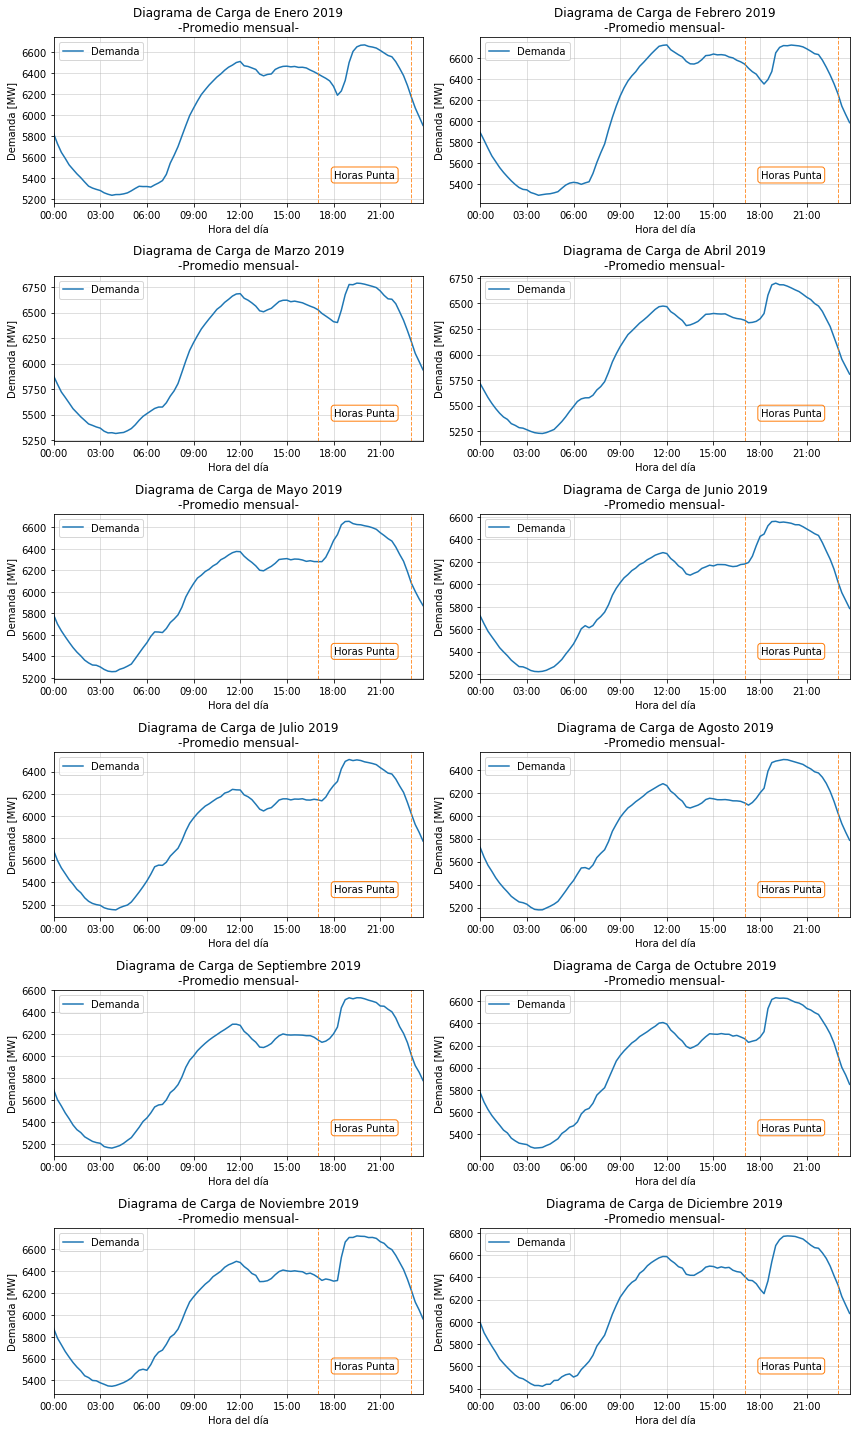

In [191]:
# Diagrama de carga - promedio mensual ---
# Este diagrama es solo para ver la forma de la curva de demanda
# Para fines de análisis y de proyecciones se debe usar el día de máxima demanda
# Acá no señalo (marcador) el Ymáx (demanda máxima) porque solo es un promedio mensual para visualización

hourly_ticks_3 = 3*60*60*np.arange(8)

months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 20))

for by_month, ax, month in zip(by_time_month, fig.get_axes(), months):
    ax.plot(by_month, label='Demanda')
    ax.set_xticks(hourly_ticks_3)
    ax.set_title('Diagrama de Carga de ' + month + ' 2019' + '\n-Promedio mensual-')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Demanda [MW]')
    ax.set_xlim("00:00", "23:45")
    ax.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.text("20:00", 0.15, 'Horas Punta', transform=ax.get_xaxis_transform(), 
            bbox=dict(fc='none', ec='C1', boxstyle='round'), ha='center')
    ax.grid(True, lw=0.8, alpha=0.5)
    ax.legend()
    
plt.tight_layout()

### 3.3 Diagrama de Carga - Día de Máxima Demanda Mensual

In [150]:
#Muestra la maxima demanda mensual sin mostrar el día y la hora en la que ocurre ---
#Te muestra la demanda máxima como un punto al final del mes
max_monthly_demand = demand.resample('M').max()
max_monthly_demand

,DEMANDA TOTAL
FECHA,
2019-01-31,7006.35034
2019-02-28,7107.55028
2019-03-31,7085.87830
2019-04-30,6919.38664
2019-05-31,6836.45772
2019-06-30,6794.00608
2019-07-31,6716.17501
2019-08-31,6690.58870
2019-09-30,6672.27642


In [151]:
#Muestra la maxima demanda mensual, ademas muestra el día y la hora en la que ocurre ---
day_max_monthly_demand = demand.loc[demand.groupby(pd.Grouper(freq='M')).idxmax().iloc[:, 0]]
day_max_monthly_demand

,DEMANDA TOTAL
FECHA,
2019-01-29 15:45:00,7006.35034
2019-02-05 15:45:00,7107.55028
2019-03-12 12:00:00,7085.87830
2019-04-23 15:30:00,6919.38664
2019-05-09 19:00:00,6836.45772
2019-06-19 18:00:00,6794.00608
2019-07-23 19:00:00,6716.17501
2019-08-26 19:30:00,6690.58870
2019-09-10 18:45:00,6672.27642


In [169]:
# Extrayendo los días de máxima demanda mensual en una lista ---
date_max = day_max_monthly_demand.index[:].format() #Extrae los índices (fecha) como tipo string en una lista

date_max[:] = (elem[:10] for elem in date_max) #Recorta los elementos de una lista

date_max

['2019-01-29',
 '2019-02-05',
 '2019-03-12',
 '2019-04-23',
 '2019-05-09',
 '2019-06-19',
 '2019-07-23',
 '2019-08-26',
 '2019-09-10',
 '2019-10-29',
 '2019-11-12',
 '2019-12-02']

In [156]:
from scipy.signal import argrelextrema
from datetime import timedelta

# Obteniendo el perfil diario de cada día de máxima demanda mensual
by_time_month_max = []
for day in date_max:
    b_t_m_m = demand[day].groupby(demand[day].index.time).max()
    by_time_month_max.append(b_t_m_m)

#Encuentra valores máximos (picos) automáticamente. Salida: abcisa
peaks = []
for i in by_time_month_max:
    ilocs_max = argrelextrema(i.values, np.greater_equal, order=96)[0]
    peaks.append(ilocs_max)

#Transformando abcisa del pico en formato hh:mm:ss
x_max_day = []
for x in peaks:
    x_month = str(timedelta(hours=float(x/4)))
    x_max_day.append(x_month)

#Obteniendo ordenada del pico
y_max_day = []
for y, z in zip(by_time_month_max, peaks):
    y_month = float(y.values[z]) 
    y_max_day.append(y_month)

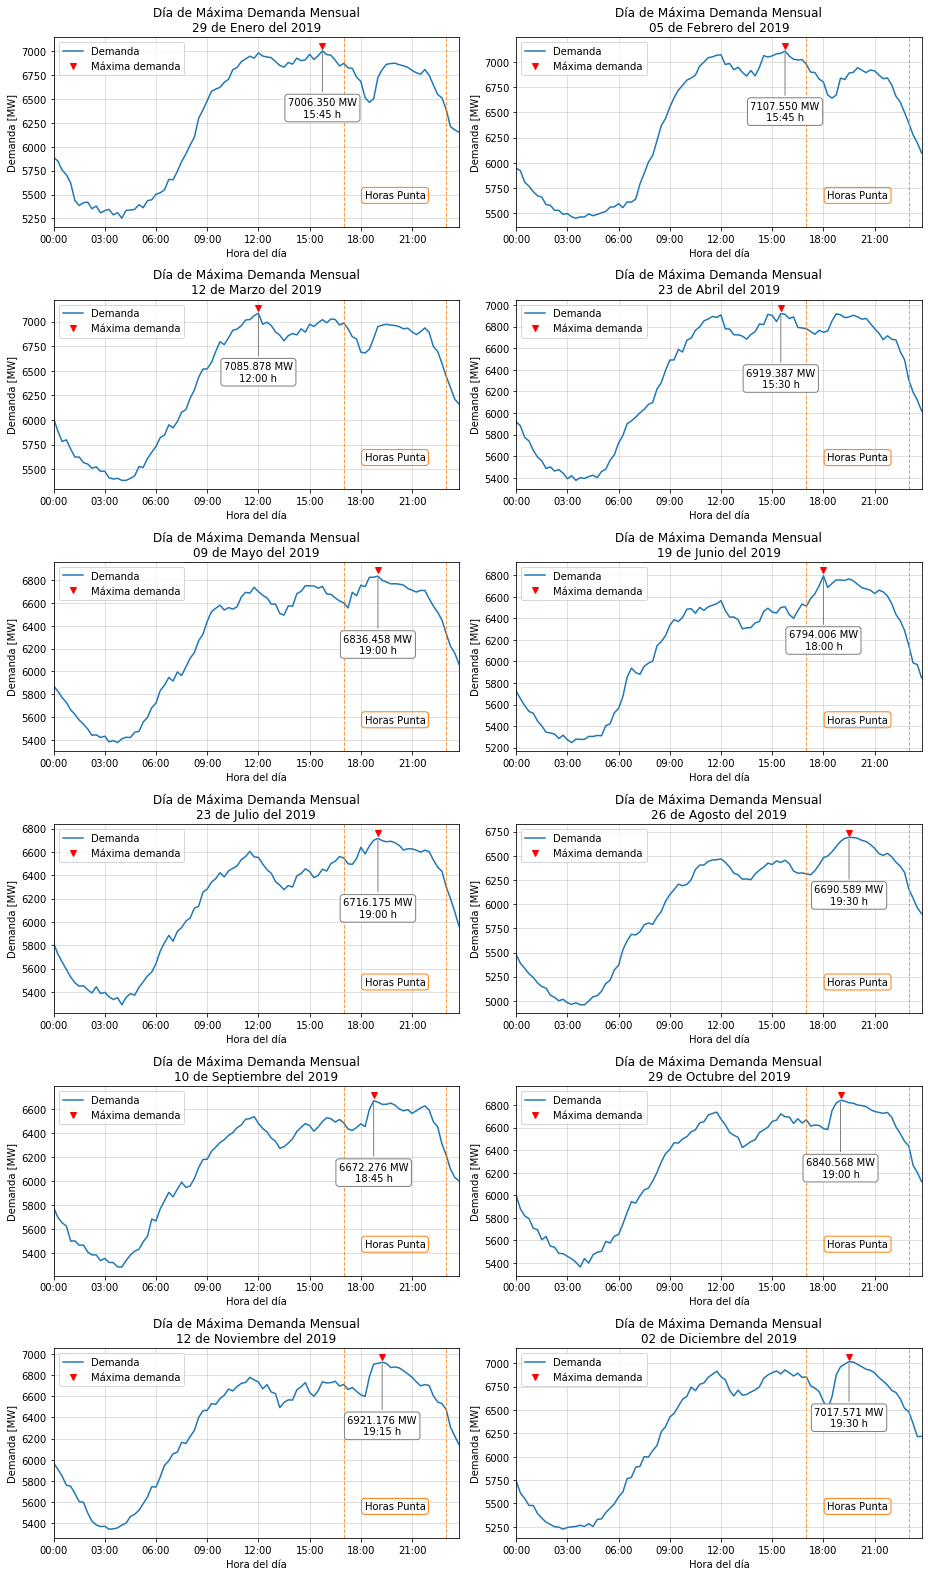

In [190]:
#Diagrama de carga - Día de máxima demanda mensual ---

hourly_ticks_3 = 3*60*60*np.arange(8)

days = date_max[:]
days[:] = (elem[-2:] for elem in days)

months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
          'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(13, 22))

for by_month_max, peak, day, month, ax, x, y in zip(by_time_month_max, peaks, days, months, fig.get_axes(), x_max_day, y_max_day):
    ax.plot(by_month_max, label='Demanda')
    ax.plot(by_month_max.iloc[peak]+50, 's', color='red', marker="v", label='Máxima demanda')    
    ax.set_xticks(hourly_ticks_3)
    ax.set_title(f'Día de Máxima Demanda Mensual\n{day} de {month} del 2019')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Demanda [MW]')
    ax.set_xlim("00:00", "23:45")
    ax.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.text("20:00", 0.15, 'Horas Punta', transform=ax.get_xaxis_transform(),
            bbox=dict(fc='none', ec='C1', boxstyle='round'), ha='center')
    ax.grid(True, lw=0.8, alpha=0.5)
    ax.annotate("{:.3f} MW\n{:.5} h".format(y, x), xy=(x, y), xytext=(x, y-600), 
                arrowprops=dict(arrowstyle='-', color='0.5'), 
                bbox=dict(boxstyle="round", fc="w", ec='0.5', alpha=1), ha='center', va='center')
    ax.legend()

plt.tight_layout()

### Máxima demanda diaria

In [233]:
#Demanda máxima diaria
demand_daily = demand.resample('D').max()

demand_daily

,DEMANDA TOTAL
FECHA,
2019-01-01,5863.16230
2019-01-02,6669.07246
2019-01-03,6600.23857
2019-01-04,6741.84206
2019-01-05,6600.03690
2019-01-06,6464.27589
2019-01-07,6799.14809
2019-01-08,6782.35180
2019-01-09,6871.95925


In [28]:
demand_daily.info()

demand_daily.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2019-01-01 to 2020-01-01
Freq: D
Data columns (total 1 columns):
EJECUTADO    366 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


,EJECUTADO
count,366.000000
mean,6751.963119
std,196.561752
min,5852.738370
25%,6619.009250
50%,6754.062365
75%,6869.548263
max,7229.156810


In [29]:
#Eliminando el último día que pertenece al año siguiente
demand_daily.drop(demand_daily.index[-1], inplace=True)

In [30]:
demand_daily.tail(5)

,EJECUTADO
FECHA,
2019-12-27,6924.36859
2019-12-28,6856.72739
2019-12-29,6847.88330
2019-12-30,6828.00195
2019-12-31,6543.60760


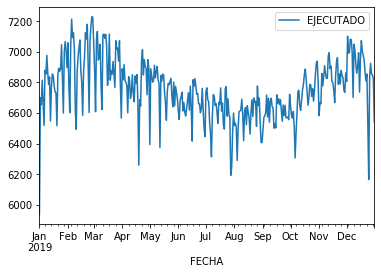

In [31]:
demand_daily.plot()

In [193]:
day_max_daily_demand = demand.loc[demand.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]
day_max_daily_demand

,DEMANDA TOTAL
FECHA,
2019-01-01 20:15:00,5863.16230
2019-01-02 19:45:00,6669.07246
2019-01-03 20:00:00,6600.23857
2019-01-04 20:00:00,6741.84206
2019-01-05 19:45:00,6600.03690
2019-01-06 19:45:00,6464.27589
2019-01-07 20:00:00,6799.14809
2019-01-08 15:45:00,6782.35180
2019-01-09 14:45:00,6871.95925


In [33]:
#contar cuantos caen dentro de HP y cuantos dentro de HFP
#Al sumar #HP + #HFP = 365
#Separa datetime into day and time columns

### HeatMAP Calendar

In [ ]:
import seaborn as sns

In [68]:
demand_daily_reset = demand_daily.reset_index()

In [69]:
demand_daily_reset

,FECHA,EJECUTADO,PROG. DIARIA,PROG. SEMANAL
0,2019-01-01,5938.40534,6107.15908,6150.65828
1,2019-01-02,6699.31409,6684.53769,6649.46640
2,2019-01-03,6652.73381,6817.54673,6817.95857
3,2019-01-04,6814.41511,6853.29262,6910.07622
4,2019-01-05,6669.97762,6848.46491,6823.88910
5,2019-01-06,6518.56460,6727.70220,6768.14037
6,2019-01-07,6878.44830,6934.27068,6959.47402
7,2019-01-08,6853.82892,6787.32727,6991.18488
8,2019-01-09,6976.35855,6852.92445,7093.29056
9,2019-01-10,6866.14933,6986.16765,7030.67665


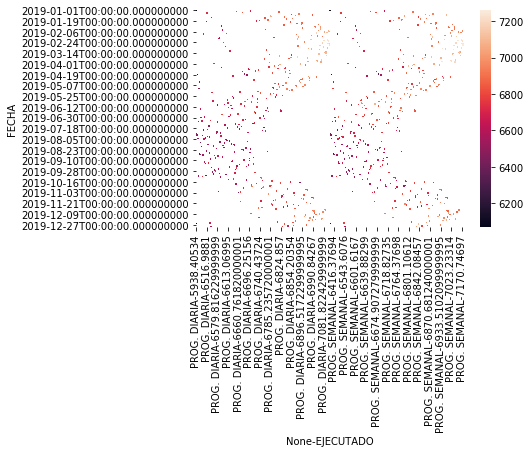

In [70]:
example = demand_daily_reset.pivot('FECHA', 'EJECUTADO')
display = sns.heatmap(example)